# **Data Import**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/hotel_bookings.csv')
data.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [5]:
print(data.isnull().sum())

index                                  0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent           

In [6]:
zero_guests = list(data.loc[data["adults"]
              + data["children"]
              + data["babies"]==0].index)
data.drop(data.index[zero_guests], inplace=True)

# **EDA**

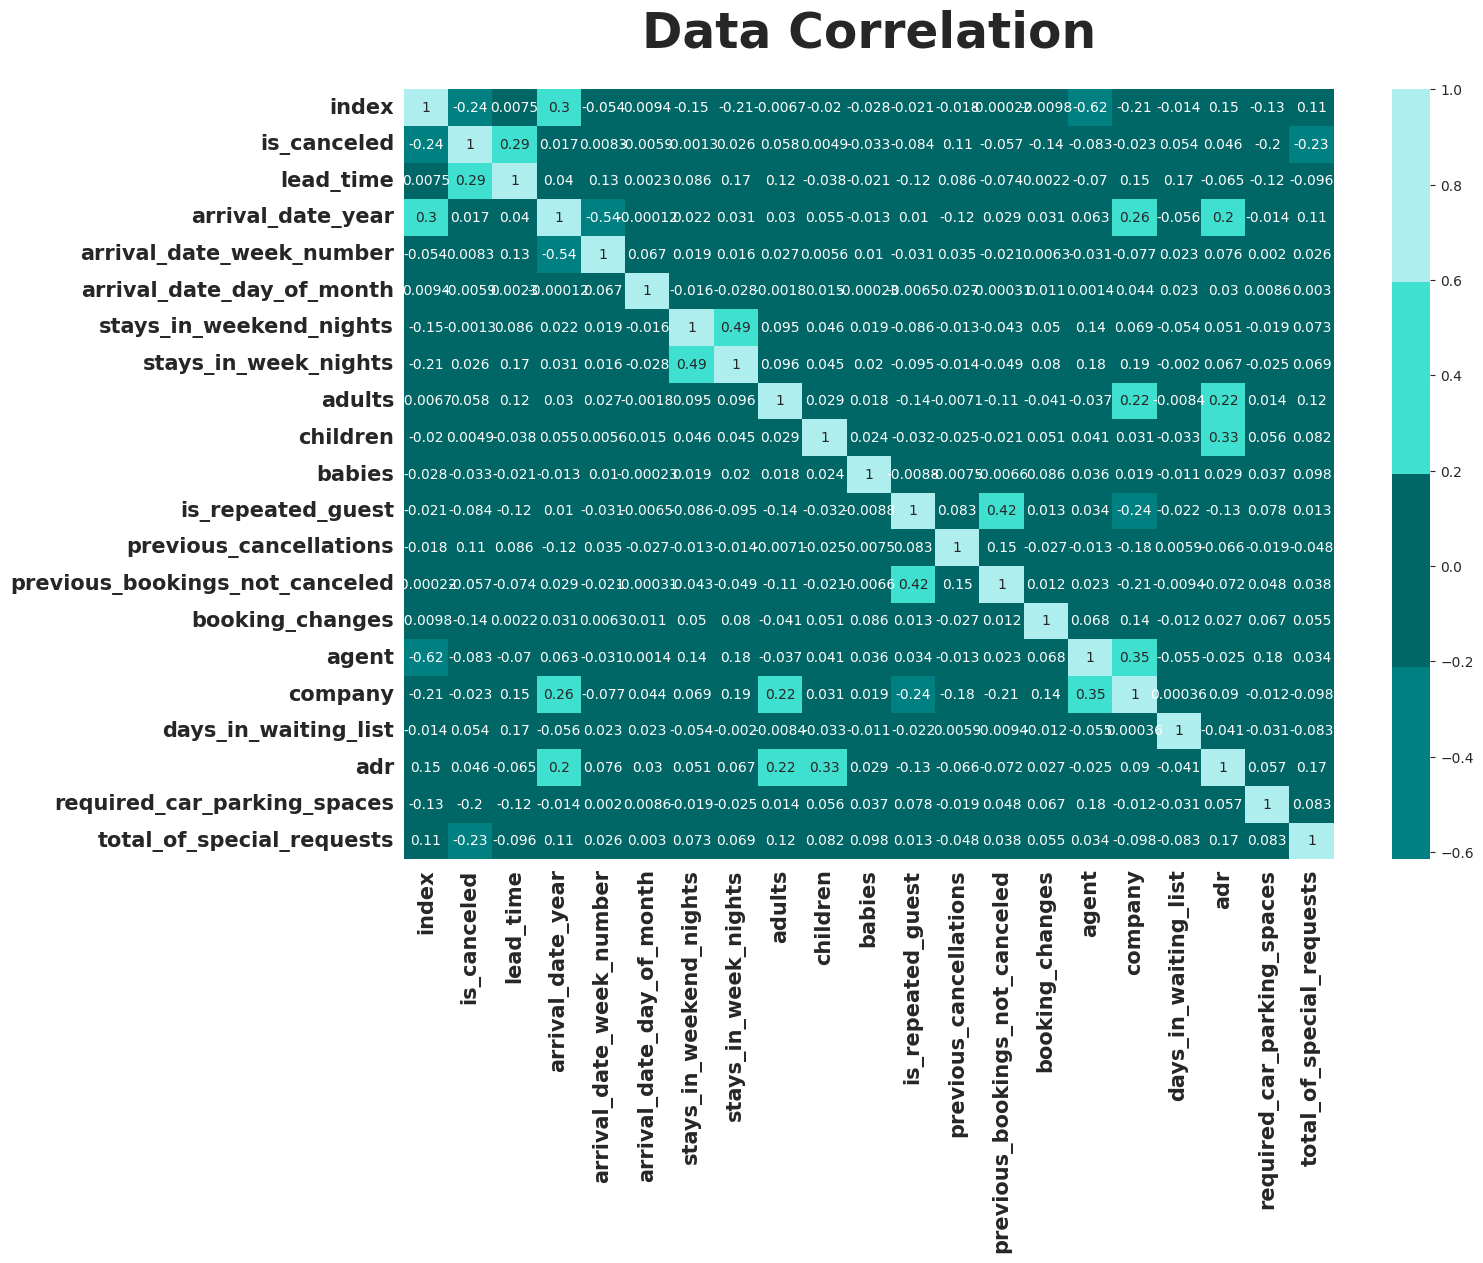

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), cmap=['#008080', '#006666', '#40E0D0', '#AFEEEE'], annot=True)
plt.title("Data Correlation", weight="bold", fontsize=35, pad=30)  # title
plt.xticks(weight="bold", fontsize=15)
plt.yticks(weight="bold", fontsize=15)
plt.show()

In [8]:
(data.corr()['lead_time'].sort_values(ascending=False).to_frame().T)

,lead_time,is_canceled,days_in_waiting_list,stays_in_week_nights,company,arrival_date_week_number,adults,previous_cancellations,stays_in_weekend_nights,arrival_date_year,...,arrival_date_day_of_month,booking_changes,babies,children,adr,agent,previous_bookings_not_canceled,total_of_special_requests,required_car_parking_spaces,is_repeated_guest
lead_time,1.0,0.292876,0.170008,0.166892,0.152539,0.127046,0.117575,0.086025,0.085985,0.040334,...,0.002306,0.00223,-0.021003,-0.037886,-0.065018,-0.070072,-0.073599,-0.095949,-0.116624,-0.123209


In [9]:
data_numeric = data.describe(include=[np.number])
"Statistical Measure of Data in Numeric Data"
data_numeric

,index,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119206.000000,...,119210.000000,119210.000000,119210.000000,119210.000000,102930.000000,6768.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,59655.939107,0.370766,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859206,0.104047,...,0.031499,0.087191,0.137094,0.218799,86.733965,189.090869,2.321215,101.969092,0.062553,0.571504
std,34460.032979,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.575186,0.398842,...,0.174663,0.844918,1.498137,0.638504,110.789818,131.589843,17.598002,50.434007,0.245360,0.792876
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,29809.250000,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.500000,0.000000,0.000000
50%,59636.500000,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.000000,178.000000,0.000000,94.950000,0.000000,0.000000
75%,89483.750000,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,119389.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,...,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [10]:
data_object = data.describe(exclude=[np.number])
"Statistical Measure of Data in Object / Str Data"
data_object

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119210,119210,119210,118732,119210,119210,119210,119210,119210,119210,119210,119210
unique,2,12,5,177,8,5,9,11,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,21-10-15
freq,79163,13861,92236,48483,56408,97750,85873,74020,104461,89476,75011,1460


We can see here that there is a strong correlation between several things:
1. lead_time with is_cancelled
   The chance of order cancellation will be much higher for customers who make orders in advance because plans that have been planned in advance are more likely to change due to unforeseen events. Another possible reason why customers cancel bookings made well in advance (which is often made easier by the option to do so for free) is due to a change of plans, natural disaster or sudden illness.
2. previous_bookings_not_cancelled with is_repeated
   We can conclude from the data contained here that the majority of customers who make repeated orders do not cancel their previous orders because they are satisfied with the service at the hotel. From this we can see that if we can reduce the cancellation rate on hotel bookings, we will have a higher chance of increasing the number of customers who will make repeat bookings.

# **Task**

**How many guests per month based on the hotel each year?**

In [11]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
guest_data = data[data['is_canceled'] == 0].copy()
guests_monthly = guest_data[['hotel', 'arrival_date_year', 'arrival_date_month', 'adults', 'children', 'babies']].sort_values('arrival_date_year')
guests_monthly['total visitors'] = guests_monthly['adults'] + guests_monthly['children'] + guests_monthly['babies']
guests_monthly = guests_monthly.astype({'total visitors' : int})
guests_monthly = guests_monthly.drop(['adults', 'children', 'babies'], axis=1)
guests_monthly.head()

,hotel,arrival_date_year,arrival_date_month,total visitors
0,Resort Hotel,2015,July,2
43256,City Hotel,2015,September,2
43257,City Hotel,2015,September,2
43258,City Hotel,2015,September,2
43259,City Hotel,2015,September,2


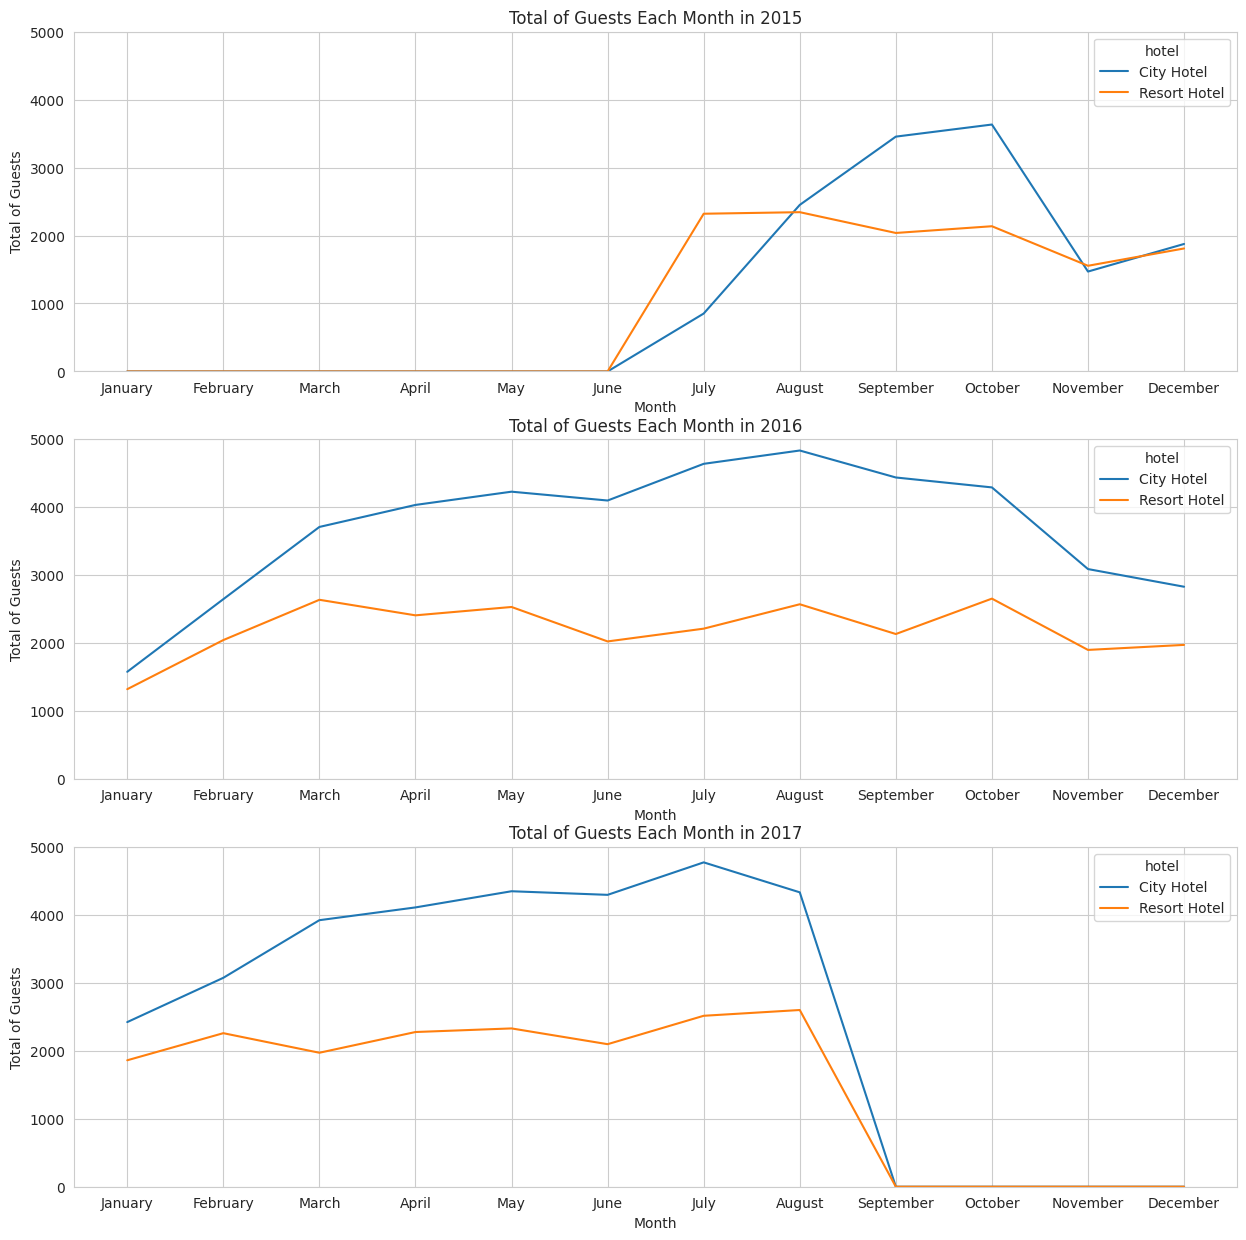

In [12]:
guests_monthly['arrival_date_month'] = pd.Categorical(guests_monthly['arrival_date_month'], categories=months, ordered=True)
guests_monthly = guests_monthly.groupby(['hotel', 'arrival_date_year', 'arrival_date_month'], as_index = False).sum()

f, ax = plt.subplots(3,1,figsize=(15,15))
sns.lineplot(x = 'arrival_date_month', y="total visitors", hue="hotel", data=guests_monthly[guests_monthly['arrival_date_year'] == 2015],  ci="sd", ax=ax[0])
sns.lineplot(x = 'arrival_date_month', y="total visitors", hue="hotel", data=guests_monthly[guests_monthly['arrival_date_year'] == 2016],  ci="sd", ax=ax[1])
sns.lineplot(x = 'arrival_date_month', y="total visitors", hue="hotel", data=guests_monthly[guests_monthly['arrival_date_year'] == 2017],  ci="sd", ax=ax[2])

ax[0].set(title="Total of Guests Each Month in 2015")
ax[0].set(xlabel="Month", ylabel="Total of Guests")
ax[0].set(ylim = (0,5000))

ax[1].set(title="Total of Guests Each Month in 2016")
ax[1].set(xlabel="Month", ylabel="Total of Guests")
ax[1].set(ylim = (0,5000))

ax[2].set(title="Total of Guests Each Month in 2017")
ax[2].set(xlabel="Month", ylabel="Total of Guests")
ax[2].set(ylim = (0,5000))

plt.show()

We can see from the graph above that the total of guests per month to city hotels is greater than resort hotels each year.

**2. Which type of room is most booked?**

In [13]:
print('Frequency of bookings for each rooms in City Hotel')
print(data[(data['hotel'] == 'City Hotel')]['reserved_room_type'].value_counts())
print()
print('Frequency of bookings for each rooms in Resort Hotel')
print(data[data['hotel'] != 'City Hotel']['reserved_room_type'].value_counts())

Frequency of bookings for each rooms in City Hotel
A    62484
D    11747
F     1788
E     1537
B     1112
G      482
C       13
Name: reserved_room_type, dtype: int64

Frequency of bookings for each rooms in Resort Hotel
A    23389
D     7432
E     4982
G     1610
F     1106
C      918
H      601
L        6
B        3
Name: reserved_room_type, dtype: int64


<Axes: xlabel='reserved_room_type', ylabel='count'>

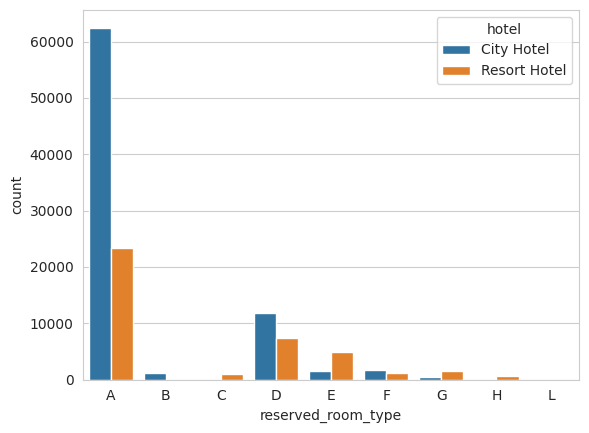

In [14]:
sns.countplot(x = 'reserved_room_type',
              data = data.sort_values('reserved_room_type'),
              hue='hotel')

The type of room that many hotels book is type A.

**3. Market_segment comparison by hotel**

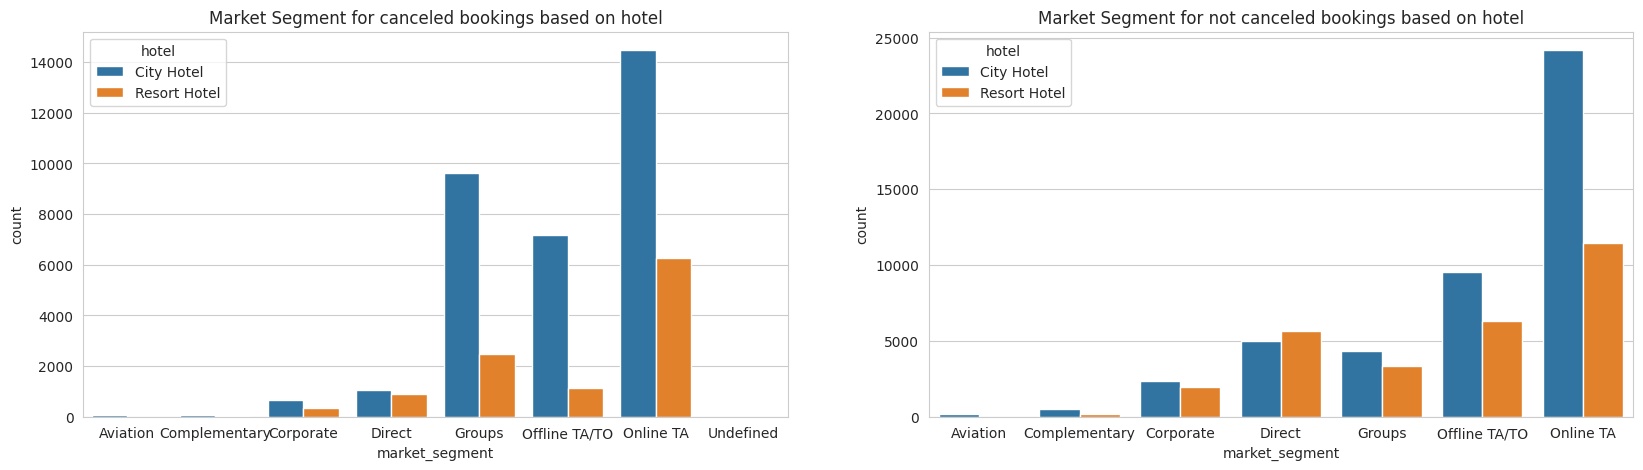

In [15]:
data_canceled = data[data['is_canceled'] == 1].sort_values('market_segment')
data_not_canceled = data[data['is_canceled'] == 0].sort_values('market_segment')
f, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(data=data_canceled, x= 'market_segment', hue='hotel', ax =ax[0])
sns.countplot(data=data_not_canceled, x= 'market_segment', hue='hotel', ax =ax[1])
ax[0].set(title='Market Segment for canceled bookings based on hotel')
ax[1].set(title='Market Segment for not canceled bookings based on hotel')
plt.show()

For bookings of resort hotels that are not canceled are more if booked through the direct segment, and more canceled if booked through Online TA segment.
Meanwhile, for the city hotels that are not canceled are more if booked through the online TA segment, and more canceled if booked through group segment.

**4. How many bookings were cancelled?**

In [16]:
total_cancelations = data['is_canceled'].sum()
resort_hotel = data.loc[data["hotel"] == "Resort Hotel"]["is_canceled"].sum()
city_hotel = data.loc[data["hotel"] == "City Hotel"]["is_canceled"].sum()

rel_cancel = (total_cancelations / data.shape[0]) * 100
resort_hotel = (resort_hotel / data.loc[data["hotel"] == "Resort Hotel"].shape[0]) * 100
city_hotel = (city_hotel / data.loc[data["hotel"] == "City Hotel"].shape[0]) * 100

print(f"Total of Cancelations: {total_cancelations:} ({rel_cancel:.0f} %)")
print(f"Total of Cancelations in Resort Hotel: {resort_hotel:} ({resort_hotel:.0f} %)")
print(f"Total of Cancelations in City Hotel: {city_hotel:} ({city_hotel:.0f} %)")

Total of Cancelations: 44199 (37 %)
Total of Cancelations in Resort Hotel: 27.767373336329815 (28 %)
Total of Cancelations in City Hotel: 41.785935348584566 (42 %)


**5. How much probabilty for next people will canceled based on hotel?**

In [17]:
grouped_data = data.groupby('hotel')['is_canceled'].agg(['sum', 'count']).reset_index()
grouped_data['prob_cancellation'] = grouped_data['sum'] / grouped_data['count']
grouped_data['prob_no_cancellation'] = 1 - grouped_data['prob_cancellation']
for index, row in grouped_data.iterrows():
    print(f"Probability for the next people in {row['hotel']} to cancel a booking: {row['prob_cancellation']:.2%}")
    print(f"Probability for the next people in {row['hotel']} not to cancel a booking: {row['prob_no_cancellation']:.2%}")
    print()

Probability for the next people in City Hotel to cancel a booking: 41.79%
Probability for the next people in City Hotel not to cancel a booking: 58.21%

Probability for the next people in Resort Hotel to cancel a booking: 27.77%
Probability for the next people in Resort Hotel not to cancel a booking: 72.23%



# **Machine Learning**

In [18]:
for i in data.columns:
    print(i,data[i].unique())

index [     0      1      2 ... 119387 119388 119389]
hotel ['Resort Hotel' 'City Hotel']
is_canceled [0 1]
lead_time [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 2

In [19]:
data['agent']=data['agent'].replace(np.nan,data['agent'].mean())
data['country']=data['country'].replace(np.nan,'other')
data['company'] = data['company'].replace(np.nan, data['company'].mean())

In [20]:
enc=LabelEncoder()
data['hotel']=enc.fit_transform(data['hotel'])
data['country'] = enc.fit_transform(data['country'])
data['market_segment'] = enc.fit_transform(data['market_segment'])
data['distribution_channel'] = enc.fit_transform(data['distribution_channel'])
data['meal'] = enc.fit_transform(data['meal'])
data['reserved_room_type'] = enc.fit_transform(data['reserved_room_type'])
data['assigned_room_type'] = enc.fit_transform(data['assigned_room_type'])
data['deposit_type'] = enc.fit_transform(data['deposit_type'])
data['customer_type'] = enc.fit_transform(data['customer_type'])
data['reservation_status'] = enc.fit_transform(data['reservation_status'])
data['arrival_date_month'] = enc.fit_transform(data['arrival_date_month'])

In [21]:
data=data.dropna()

In [22]:
data = data.drop('reservation_status_date' , axis = 1 )

In [23]:
X = data.drop('is_canceled', axis=1)
y = data['is_canceled']

**with random forest**

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)

In [26]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
y_train_pred_rf = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)

In [28]:
accuracy_train = accuracy_score(y_train, y_train_pred_rf)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy train:", accuracy_train)
accuracy_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", accuracy_matrix)
y_pred_new_data = rf_model.predict(scaler.transform(X))
print("Accuracy on new data:", accuracy_test)

Accuracy train: 1.0
Confusion Matrix:
 [[14847     0]
 [    1  8994]]
Accuracy on new data: 0.9999580572099656


**And finally the accuracy results were 99.99%**

In [29]:
predicted_data = pd.DataFrame({'is_canceled': pd.Series(y_pred_new_data)})
predicted_data.head(10)

,is_canceled
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,1


In [30]:
#It's time to export the result into file excel
predicted_data.to_excel('/content/drive/MyDrive/Hasil Prediksi.xlsx')